# Visualizations of P-Nodes
Includes bar charts and matrix visualizations.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.sparse import csr_matrix 
from mpl_toolkits.mplot3d import Axes3D

import os

from pq_helper import get_dataframe

Helper functions for plotting:

In [120]:
def bar_chart(x_axis, y_axis, x_label, y_label, title, rotation=0):
    index = np.arange(len(x_axis))
    plt.bar(index, y_axis)
    plt.xlabel('%s' % x_label, fontsize=10)
    plt.ylabel('%s' % y_label, fontsize=10)
    plt.xticks(index, x_axis, fontsize=10, rotation=rotation)    
    plt.title('%s' % title)
    plt.show() 
    
def stacked_bar_chart(sheet, x_label, y_label, title, rotation=0, normal=False, sort=False):
    df = pd.crosstab(sheet[x_label], sheet[y_label], normalize=normal)
    if sort: 
        df = df.loc[sheet[x_label].value_counts().index]
    df.plot(kind='bar', stacked=True, fontsize=10)
    plt.title('%s' % title, fontsize=15)   
    plt.xticks(rotation=rotation, fontsize=10)        
    if normal == False: 
        plt.ylabel('Number of Students', fontsize=10)
    else:
        plt.ylabel('Fraction of Students', fontsize=10)
    plt.legend(bbox_to_anchor=(1.35, 1), loc = 'upper right', fancybox=True, framealpha=0.5)
    plt.show()  

def matrix(row_label, col_label, data_label, row_list, col_list, title, r, c):
    x = p_nodes.groupby([row_label, col_label]).mean()   
    row = []
    for j in range(len(c)):
        row.append(row_list.index(r[j]))
    row = np.array(row)
    col = []
    for i in range(len(c)):
        col.append(col_list.index(c[i]))
    col = np.array(col)
    data = [] 
    for i in range(len(c)):
        data.append(x[data_label][i])
    data = np.array(data)
    
    avg_views = csr_matrix((data, (row, col)), 
                           shape=(len(row_list), len(col_list))).toarray()
    plt.imshow(avg_views, cmap='Blues')
    plt.title(title)
    plt.xticks(np.arange(len(col_list)), col_list, rotation=90)    
    plt.yticks(np.arange(len(row_list)), row_list)
    clb = plt.colorbar(cmap=plt.cm.get_cmap('Blues'))
    plt.xlabel(col_label)
    plt.ylabel(row_label)
    clb.set_label('Average %s' % data_label)    
    
def scatter3D(x_list, y_list, z_list, colors, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')    
    
    for i in range(len(x_list)): # only look at students, not TAs/instructor
        ax.scatter(x_list[i], y_list[i], z_list[i], c=colors[i], 
                   label=labels[i]) 
        
    ax.set_xlabel('N-Score')
    ax.set_ylabel('Days Online')
    ax.set_zlabel('Views')
    plt.legend(loc=2)
    
    plt.show()

First, load in the data:

In [102]:
data_path = 'data/'
path = os.path.join(data_path, 'acm95a100a2018_anonymized_modified.xlsx')
(p_nodes, q_nodes, links, mod_p_nodes) = get_dataframe(path)

In [103]:
p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


In [104]:
mod_p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,Option2,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B,0,ME,0.0,0.0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A,1,Other,1.0,5.0,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A,1,Other,4.0,4.0,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A,1,Other,0.0,3.0,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A,1,ME,20.0,9.0,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,Other,NaN,NaN,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,Other,NaN,NaN,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,Other,NaN,NaN,N


Note a key difference between `p_nodes` and `mod_p_nodes`:

1. In `mod_p_nodes`, different tracks of the same option are combined together under one option title (i.e. ChE (MS) and ChE (PS) are both considered to be ChE).

2. In `mod_p_nodes`, a second `Option2` column contains either the same value as `Option` if the option is among the top 6 options, or 'Other' if not.

We will mostly use `mod_p_nodes` for our visualizations, though occasionally we will include plots using `p_nodes` for comparison.

Set up lists and dictionaries of options, classes, and grades:

In [105]:
option_dict = {'ACM': 'CMS', 'AM': 'MCE', 'APh': 'APMS', 'Ae':'EAS', 
                'Aph':'APMS', 'BE':'BBE', 'BMB':'CCE', 'Bi':'BBE', 
                'CS':'CMS', 'Ch':'CCE', 'ChE': 'CCE', 'ChE (BM)':'CCE', 
                'ChE (Env)':'CCE', 'ChE (MS)':'CCE', 'ChE (PS)': 'CCE', 
                'EE':'EE', 'Eng': 'Hum', 'Eng (CNS)': 'Hum', 'Ge': 'GPS', 
                'ME':'MCE', 'MS':'APMS', 'MedE': 'MedE', 'Ph': 'PMA', 
                'PlSc':'Hum', 'SE':'EAS', 'AsPh':'PMA'}
options = ['ACM', 'AM', 'APh', 'Ae', 'AsPh', 'BE', 'BMB', 'Bi', 'CS', 'Ch', 
            'ChE', 'ChE (BM)', 'ChE (Env)', 'ChE (MS)', 'ChE (PS)', 'EE', 
            'Eng', 'Eng (CNS)', 'Ge', 'ME', 'MS', 'MedE', 'Ph', 'PlSc', 'SE']
classes_g_to_u = ['G1', 'G2', 'G5', 'U2', 'U3', 'U4']
classes_u_to_g = ['U2', 'U3', 'U4', 'G1', 'G2', 'G5']
undergrad = ['U2', 'U3', 'U4']      
grade_dict = {'A+': 'A', 'A': 'A', 'A-': 'A', 'B+': 'B', 'B': 'B', 
                'B-': 'B', 'C+': 'C', 'C': 'C', 'C-': 'C', 'D+': 'D'}
grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+']

Add column for seniority to $p$-node dataframes:

In [106]:
# Separate by UG vs G (N means neither (Instructor and TAs))
mod_p_nodes['Seniority'] = [item[0] for item in mod_p_nodes['Class'][0:184]] + ['N'] * 12    
p_nodes['Seniority'] = [item[0] for item in p_nodes['Class'][0:184]] + ['N'] * 12
p_nodes

,ID,Role,Class,Option,Section,DaysOnline,Views,Contributions,Questions,Notes,Answers,N-Score,Grade,Status,In-Degree,Out-Degree,Seniority
0,P1,Student,U2,ME,5.0,48,60,0,0,0,0,0.531170,B+,0,0,0,U
1,P2,Student,U2,ACM,5.0,150,219,14,0,0,13,0.918357,A+,1,1,5,U
2,P3,Student,U2,ACM,7.0,245,215,9,1,0,4,0.864791,A+,1,4,4,U
3,P4,Student,U3,CS,1.0,107,215,3,0,0,2,0.928847,A+,1,0,3,U
4,P5,Student,U2,ME,3.0,53,216,38,10,0,15,0.944688,A+,1,20,9,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,P192,TA,NaN,NaN,8.0,59,88,1,0,0,0,NaN,NaN,1,0,1,N
192,P193,TA,NaN,NaN,9.0,78,34,0,0,0,0,NaN,NaN,1,0,1,N
193,P194,TA,NaN,NaN,10.0,36,53,3,0,2,1,NaN,NaN,0,0,0,N
194,P195,Head TA,NaN,NaN,NaN,74,237,228,0,7,153,NaN,NaN,1,0,125,N


We will explore with various plots of the $p$-node distributions. First, we examine the distribution of the class in terms of Class and Seniority (Undergrad vs Grad).

In [107]:
mod_p_nodes['Class'].value_counts()

U2    84
G1    54
U3    39
U4     4
G2     2
G5     1
Name: Class, dtype: int64

In [108]:
mod_p_nodes['Seniority'].value_counts()

U    127
G     57
N     12
Name: Seniority, dtype: int64

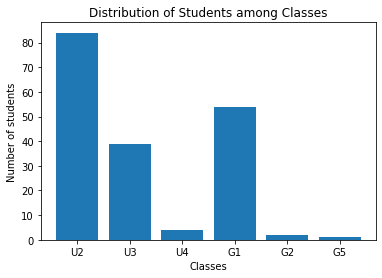

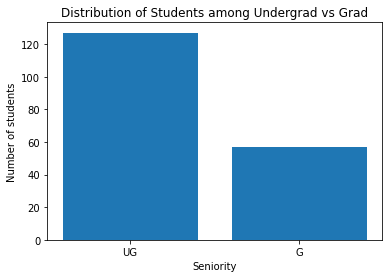

In [109]:
class_numbers = [84, 39, 4, 54, 2, 1]  
bar_chart(classes_u_to_g, class_numbers, 'Classes', 'Number of students', 'Distribution of Students among Classes') 
    
# undergrad vs grad
bar_chart(['UG', 'G'], [127, 57], 'Seniority', 'Number of students', 'Distribution of Students among Undergrad vs Grad')     

Undergraduates make up just over two-thirds of the class. Among undergraduates, sophomores and juniors are most likely to take the course, while first-year graduate students make up the majority of the graduate student enrollment. 

Next, we'll look at the distribution of options within each class.

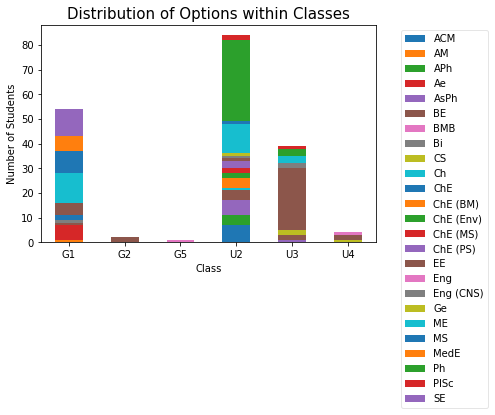

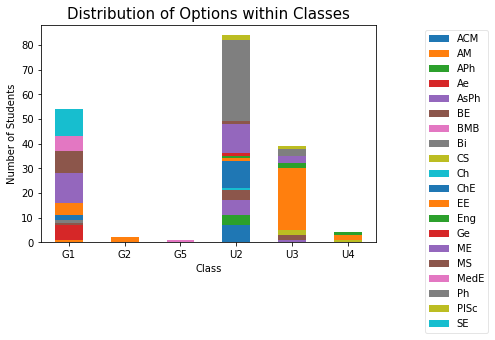

In [118]:
stacked_bar_chart(p_nodes, 'Class', 'Option', 'Distribution of Options within Classes') 
stacked_bar_chart(mod_p_nodes, 'Class', 'Option', 'Distribution of Options within Classes')

Since many options only have a few students, we will look at the top 6 options and group the remaining into 'Other'. For reference, we include below the code used to compute the `Option2` column. 
 ```python
top6 = mod_p_nodes['Option'].value_counts().index[:6]
mod_p_nodes['Option2'] = mod_p_nodes['Option'].apply(lambda x: x if x in top6 else 'Other')
with pd.ExcelWriter(os.path.join(data_path, 'acm95a100a2018_anonymized_modified.xlsx')) as writer:
    p_nodes.to_excel(writer,'P-Nodes', index=False)
    q_nodes.to_excel(writer,'Q-Nodes', index=False)
    links.to_excel(writer,'Links', index=False)
    mod_p_nodes.to_excel(writer,'P-Nodes-Modified', index=False)
    writer.save()
```


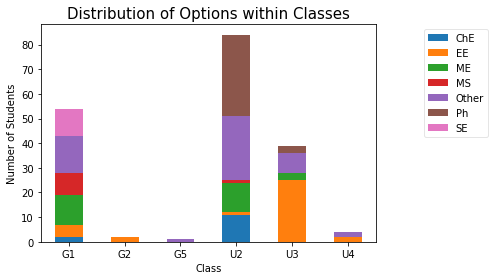

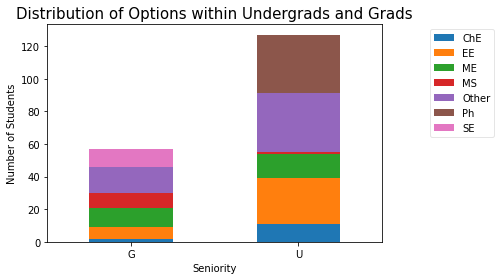

In [117]:
# Taking the top 6 options only and putting the rest as 'Other':
stacked_bar_chart(mod_p_nodes, 'Class', 'Option2', 'Distribution of Options within Classes')  
stacked_bar_chart(mod_p_nodes.loc[mod_p_nodes['Seniority'] != 'N'], 'Seniority', 'Option2', 'Distribution of Options within Undergrads and Grads') 

We see that there is a good mix of options among grad students. Among undergraduates, physics and electrical engineering are common majors. Physics is the most common major among sophomores and electrical engineering is the most common major among juniors. This breakdown likely reflects patterns of when students of each option tend to take their ACM95ab requirement.

We'll now look at the distribution of grades within each class and within undergrads/grads. We find that `+/-` grades do not add much value to the plots, so we combine them into a single letter grade. 

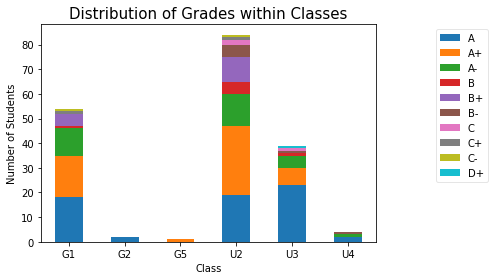

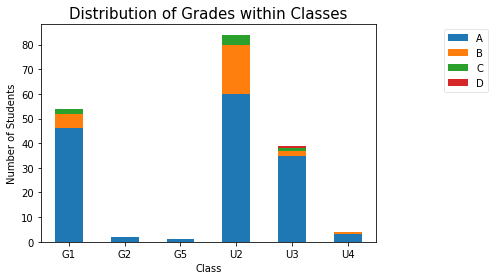

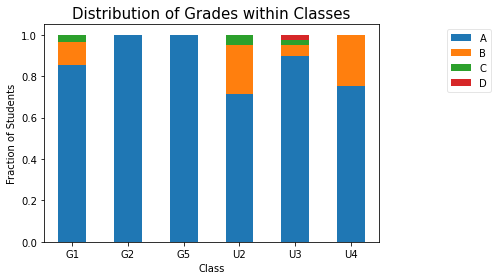

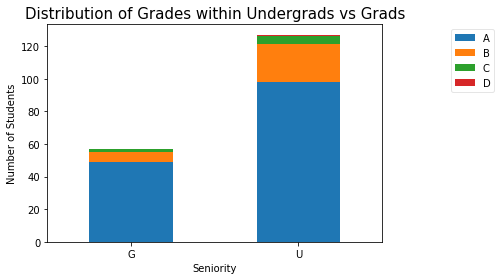

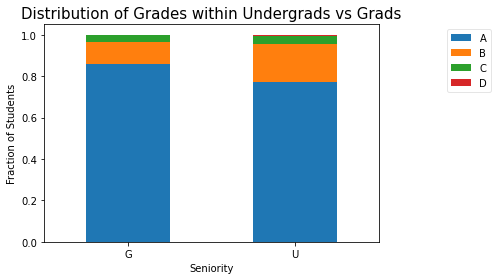

In [116]:
stacked_bar_chart(p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes')
stacked_bar_chart(mod_p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes') 
stacked_bar_chart(mod_p_nodes, 'Class', 'Grade', 'Distribution of Grades within Classes', 'index') 
stacked_bar_chart(mod_p_nodes, 'Seniority', 'Grade', 'Distribution of Grades within Undergrads vs Grads')    
stacked_bar_chart(mod_p_nodes, 'Seniority', 'Grade', 'Distribution of Grades within Undergrads vs Grads', 'index')     

The breakdown of grades across classes and seniorities appears similar. Most students received an `A` or `B` grade, and the proportion of students who received `A`s or `B`s is similar across classes and between undergrads/grads.

Let's now visualize the breakdown of students by option. As we observed previously, the top three options are physics, electrical engineering, and mechanical engineering. Chemical engineering, space engineering (grad option only), and materials science round out the top 6. These are typical majors that require ACM95ab for graduation.

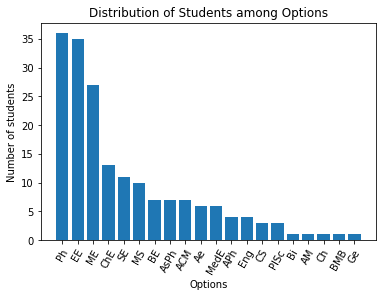

In [113]:
bar_chart(mod_p_nodes['Option'].value_counts().index, mod_p_nodes['Option'].value_counts(), 
          'Options', 'Number of students', 'Distribution of Students among Options', 60) 

Now examine the distribution of classes within each option and within undergrads/grads, sorted by the total number of students in each option.

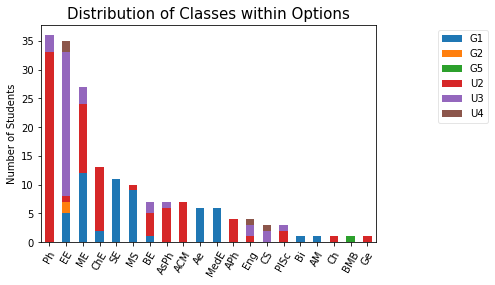

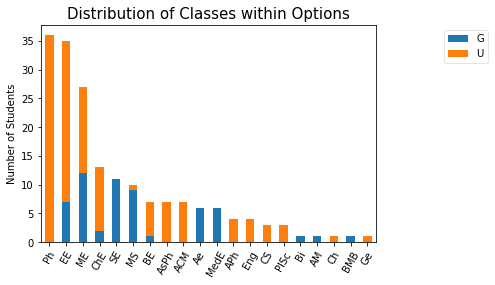

In [122]:
stacked_bar_chart(mod_p_nodes, 'Option', 'Class', 'Distribution of Classes within Options', rotation=60, sort=True) 
stacked_bar_chart(mod_p_nodes, 'Option', 'Seniority', 'Distribution of Classes within Options', rotation=60, sort=True)  

We observe that the all of the physics students are undergrads, with the vast majority being sophomores. Grad students make up the bulk of space engineering, materials science, aerospace engineering, and medical engineering students, which is expected as all of these options except materials science are grad-only.

In [ ]:
    
    
    # A.6
    #stacked_bar_chart(p_nodes, 'Option', 'Grade', 
    #                 'Distribution of Grades within Options', False)  
    #stacked_bar_chart(p_nodes, 'Option', 'Grade', 
    #                 'Distribution of Grades within Options', 'index')      
    #stacked_bar_chart(mod_p_nodes, 'Option', 'Grade', 
    #                 'Distribution of Grades within Options', False)
    #stacked_bar_chart(mod_p_nodes, 'Option', 'Grade', 
    #                 'Distribution of Grades within Options', 'index')   
    
    # reorder the bars so that they go from option with most to least people
    #df = pd.crosstab(mod_p_nodes['Option'], mod_p_nodes['Grade'])
    #df2 = df.loc[['Ph', 'EE', 'ME', 'ChE', 'SE', 'MS', 'BE', 'AsPh', 'ACM', 
    #              'MedE', 'Ae', 'Eng', 'APh', 'PlSc', 'CS', 'Ge', 'BMB', 'Ch', 
    #              'Bi', 'AM']]
    #df2.plot(kind='bar', stacked=True, fontsize=20)   
    #plt.title('Distribution of Classes within Options', fontsize=25)
    #plt.xlabel('Options', fontsize=20)
    #plt.ylabel('Number of Students', fontsize=20)  
    #plt.xticks(rotation=30)     
    
    # A.7
    #plt.figure(7) 
    #p_nodes['Grade'].value_counts().plot(kind='bar', 
    #                        title='Distribution of Final Grades')  
    #plt.xlabel('Grades')
    #plt.ylabel('Number of Students') 
    #plt.xticks(rotation=0)        
        
    #grades_numbers = [53, 64, 30, 15, 7, 7, 2, 3, 2, 1]  
    #bar_chart(grades, grades_numbers, 'Grades', 'Number of students', 
    #          'Distribution of Final Grades')  
    #plt.xticks(rotation=0)            
    
    #plt.figure(7) 
    #mod_p_nodes['Grade'].value_counts().plot(kind='bar', 
    #                        title='Distribution of Final Grades')  
    #plt.xlabel('Grades')
    #plt.ylabel('Number of Students') 
    #plt.xticks(rotation=0)            
    
    # A.8
    #stacked_bar_chart(p_nodes, 'Grade', 'Class', 
    #                 'Distribution of Classes within Grades', False)
    #stacked_bar_chart(p_nodes, 'Grade', 'Class', 
    #                 'Distribution of Classes within Grades', 'index')    
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Class', 
    #                 'Distribution of Classes within Grades', False) 
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Class', 
    #                 'Distribution of Classes within Grades', 'index') 
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Seniority', 
    #                 'Distribution of Undergrad vs Grad within Grades', False)     
    
    # A.9
    #stacked_bar_chart(p_nodes, 'Grade', 'Option', 
    #                 'Distribution of Options within Grades', False) 
    #stacked_bar_chart(p_nodes, 'Grade', 'Option', 
    #                 'Distribution of Options within Grades', 'index')     
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Option', 
    #                 'Distribution of Options within Grades', False) 
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Option', 
    #                 'Distribution of Options within Grades', 'index')
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Option2', 
    #                 'Distribution of Options within Grades', False) 
    #stacked_bar_chart(mod_p_nodes, 'Grade', 'Option2', 
    #                 'Distribution of Options within Grades', 'index')     
    
    
    # note: useful function in excel 
    # AVERAGEIFS( average_range, criteria1_range, criteria1, [criteria2_range, 
    # criteria2, criteria3_range, criteria3, ...] )    
    
    # A.17
    r = ['G1'] * 10 + ['G2'] + ['G5'] + ['U2'] * 16 + ['U3'] * 8 + ['U4'] * 3
    c = ['AM', 'Ae', 'BE', 'Bi', 'ChE', 'EE', 'ME', 'MS', 'MedE', 
                    'SE', 'EE', 'BMB', 'ACM', 'APh', 'AsPh', 'BE', 'Ch', 
                    'ChE (BM)', 'ChE (Env)', 'ChE (MS)', 'ChE (PS)', 'EE', 
                    'Eng (CNS)', 'Ge', 'ME', 'MS', 'Ph', 'PlSc', 'AsPh', 'BE', 
                    'CS', 'EE', 'Eng (CNS)', 'ME', 'Ph', 'PlSc', 'CS', 'EE', 
                    'Eng'] # total 39    
    #matrix('Class', 'Option', 'DaysOnline', classes, options,
    #       'Average Days Online', r, c)    
    
    # based on seniority instead of class
    r1 = ['G'] * 11 + ['UG'] * 18
    c1 = ['AM', 'Ae', 'BE', 'BMB', 'Bi', 'ChE', 'EE', 'ME', 'MS', 'MedE', 
                    'SE', 'ACM', 'APh', 'AsPh', 'BE', 'CS', 'Ch', 'ChE (BM)', 
                    'ChE (Env)', 'ChE (MS)', 'ChE (PS)', 'EE', 'Eng', 
                    'Eng (CNS)', 'Ge', 'ME', 'MS', 'Ph', 'PlSc'] # total 29    
    #matrix('Seniority', 'Option', 'DaysOnline', ['G', 'UG'], options,
    #       'Average Days Online', r1, c1)     
    
    # A.22
    #matrix('Class', 'Option', 'Views', classes, options,
    #       'Average Views', r, c)
    #matrix('Seniority', 'Option', 'Views', ['G', 'UG'], options,
    #      'Average Views', r1, c1)     
    
    # A.29   
    #matrix('Class', 'Option', 'N-Score', classes, options,
    #       'Average N-Score', r, c)  
    #matrix('Seniority', 'Option', 'N-Score', ['G', 'UG'], options,
    #       'Average N-Scores', r1, c1)    
    
    # A.30
    # first plot undergrads vs grads 
    #x_u = [] 
    #y_u = []
    #z_u = []
    #x_g = []
    #y_g = []
    #z_g = [] 
    
    #for i in range(184): # only look at students, not TAs/instructor
    #    if mod_p_nodes['Class'][i] in undergrad:
    #        x_u.append(mod_p_nodes['N-Score'][i])
    #        y_u.append(mod_p_nodes['DaysOnline'][i])
    #        z_u.append(mod_p_nodes['Views'][i])
    #    else: # grad students
    #        x_g.append(mod_p_nodes['N-Score'][i])
    #        y_g.append(mod_p_nodes['DaysOnline'][i])
    #        z_g.append(mod_p_nodes['Views'][i])  
    
    #scatter3D([x_u, x_g], [y_u, y_g], [z_u, z_g], ['r', 'b'], 
    #          ['Undergraduate', 'Graduate'])
    
    # now plot by grades
    #x_a = [] 
    #y_a = []
    #z_a = []
    #x_b = []
    #y_b = []
    #z_b = [] 
    #x_c = [] 
    #y_c = []
    #z_c = []
    #x_d = []
    #y_d = []
    #z_d = [] 
    
    #for i in range(184): # only look at students, not TAs/instructor
    #    if mod_p_nodes['Grade'][i] == 'A':
    #        x_a.append(mod_p_nodes['N-Score'][i])
    #        y_a.append(mod_p_nodes['DaysOnline'][i])
    #        z_a.append(mod_p_nodes['Views'][i])
    #    elif mod_p_nodes['Grade'][i] == 'B':
    #        x_b.append(mod_p_nodes['N-Score'][i])
    #        y_b.append(mod_p_nodes['DaysOnline'][i])
    #        z_b.append(mod_p_nodes['Views'][i])  
    #    elif mod_p_nodes['Grade'][i] == 'C':
    #        x_c.append(mod_p_nodes['N-Score'][i])
    #        y_c.append(mod_p_nodes['DaysOnline'][i])
    #        z_c.append(mod_p_nodes['Views'][i]) 
    #    else: # grade = D
    #        x_d.append(mod_p_nodes['N-Score'][i])
    #        y_d.append(mod_p_nodes['DaysOnline'][i])
    #        z_d.append(mod_p_nodes['Views'][i])             
    
    #scatter3D([x_a, x_b, x_c, x_d], [y_a, y_b, y_c, y_d], [z_a, z_b, z_c, z_d], 
    #          ['r', 'b', 'g', 'c'], ['A', 'B', 'C', 'D'])    
    
    # now plot by (top 6) options 
    #x_ph = [] 
    #y_ph = []
    #z_ph = []
    #x_ee = []
    #y_ee = []
    #z_ee = [] 
    #x_me = [] 
    #y_me = []
    #z_me = []
    #x_che = []
    #y_che = []
    #z_che = [] 
    #x_se = [] 
    #y_se = []
    #z_se = []
    #x_ms = []
    #y_ms = []
    #z_ms = []     
    #x_other = []
    #y_other = []
    #z_other = []     
    
    #for i in range(184): # only look at students, not TAs/instructor
    #    if mod_p_nodes['Option2'][i] == 'Ph':
    #        x_ph.append(mod_p_nodes['N-Score'][i])
    #        y_ph.append(mod_p_nodes['DaysOnline'][i])
    #        z_ph.append(mod_p_nodes['Views'][i])
    #    elif mod_p_nodes['Option2'][i] == 'EE':
    #        x_ee.append(mod_p_nodes['N-Score'][i])
    #        y_ee.append(mod_p_nodes['DaysOnline'][i])
    #        z_ee.append(mod_p_nodes['Views'][i])  
    #    elif mod_p_nodes['Option2'][i] == 'ME':
    #        x_me.append(mod_p_nodes['N-Score'][i])
    #        y_me.append(mod_p_nodes['DaysOnline'][i])
    #        z_me.append(mod_p_nodes['Views'][i]) 
    #    elif mod_p_nodes['Option2'][i] == 'ChE':
    #        x_che.append(mod_p_nodes['N-Score'][i])
    #        y_che.append(mod_p_nodes['DaysOnline'][i])
    #        z_che.append(mod_p_nodes['Views'][i]) 
    #    elif mod_p_nodes['Option2'][i] == 'SE':
    #        x_se.append(mod_p_nodes['N-Score'][i])
    #        y_se.append(mod_p_nodes['DaysOnline'][i])
    #        z_se.append(mod_p_nodes['Views'][i]) 
    #    elif mod_p_nodes['Option2'][i] == 'MS':
    #        x_ms.append(mod_p_nodes['N-Score'][i])
    #        y_ms.append(mod_p_nodes['DaysOnline'][i])
    #        z_ms.append(mod_p_nodes['Views'][i])             
    #    else: # option = other
    #        x_other.append(mod_p_nodes['N-Score'][i])
    #        y_other.append(mod_p_nodes['DaysOnline'][i])
    #        z_other.append(mod_p_nodes['Views'][i])             
    
    #scatter3D([x_ph, x_ee, x_me, x_che, x_se, x_ms, x_other], 
    #          [y_ph, y_ee, y_me, y_che, y_se, y_ms, y_other], 
    #          [z_ph, z_ee, z_me, z_che, z_se, z_ms, z_other], 
    #          ['r', 'b', 'g', 'c', 'm', 'y', 'k'], 
    #          ['Ph', 'EE', 'ME', 'ChE', 'SE', 'MS', 'Other'])        
    

